<a href="https://colab.research.google.com/github/FiliaEunikeSologia/TubesFintech_FiliaSologia/blob/main/tubes_fintech_code_filia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. PENDAHULUAN

Tugas ini merupakan tugas akhir untuk memenuhi penilaian akhir MK Analisa Keputusan untuk Teknologi Finansial. Adapun dataset terpilih adalah Credit Scoring sesuai URL berikut https://github.com/gastonstat/CreditScoring/blob/master/CleanCreditScoring.csv

Model Machine Learning yang digunakan adalah....

# 2. DATA LOADING DAN INITIAL EXPLORATION

Adapun proses Data Loading dari dataset yang digunakan menggunakan kode yang dieksekusi sebagai berikut :

In [5]:
#2.1 IMPORT LIBRARIES DAN SETUP
# MOUNT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries berhasil di-import")

Mounted at /content/drive
✓ Libraries berhasil di-import


In [6]:
# 2.2 LOAD DATASET RAW DAN CLEAN

#mendefinisikan path utk dua file dataset di gdrive
file_path_raw = '/content/drive/MyDrive/TUBES-FINTECH/Credit/CreditScoring.csv'
file_path_clean = '/content/drive/MyDrive/TUBES-FINTECH/Credit/CleanCreditScoring (1).csv'

#membaca dataset dgn pandas library
df_raw = pd.read_csv(file_path_raw) #dataset mentah
df_clean = pd.read_csv(file_path_clean) #dataset yg telah diproses

print("="*80)
print("INFORMASI DATASET")
print("="*80)

#menampilkan ukuran dataset = (jumlah baris, jumlah kolom)
print(f"\nRAW Dataset Shape  : {df_raw.shape}")
print(f"CLEAN Dataset Shape: {df_clean.shape}")
print("\nKeterangan:")
print("- RAW dataset: data mentah sebelum dibersihkan")
print("- CLEAN dataset: data yang sudah melalui preprocessing")

INFORMASI DATASET

RAW Dataset Shape  : (4455, 14)
CLEAN Dataset Shape: (4446, 27)

Keterangan:
- RAW dataset: data mentah sebelum dibersihkan
- CLEAN dataset: data yang sudah melalui preprocessing


In [7]:
### Explorasi Awal : RAW Data
print("\n" + "="*80)
print("EXPLORASI RAW DATA")
print("="*80)

#untuk validasi  awal data sebelum preprocessing
print("\nLIMA BARIS PERTAMA RAW DATA:")
print(df_raw.head())

#info tipe datanya
print("\nINFORMASI TIPE DATA RAW:")
print(df_raw.info())

print("\nSTATISTIK DESKRIPTIF RAW:")
print(df_raw.describe())


EXPLORASI RAW DATA

LIMA BARIS PERTAMA RAW DATA:
   Status  Seniority  Home  Time  Age  Marital  Records  Job  Expenses  \
0       1          9     1    60   30        2        1    3        73   
1       1         17     1    60   58        3        1    1        48   
2       2         10     2    36   46        2        2    3        90   
3       1          0     1    60   24        1        1    1        63   
4       1          0     1    36   26        1        1    1        46   

   Income  Assets  Debt  Amount  Price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910  

INFORMASI TIPE DATA RAW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniori

In [8]:
### Data Cleaning - Deteksi Nilai Ekstrem
print("\n" + "="*80)
print("DATA CLEANING: CEK NILAI EKSTREM")
print("="*80)

# Cek nilai ekstrem (99999999) = menandakan data tidak valid
# variabel yg krusial dlm analisis risiko kredit = income, aset, debt
print("\nDeteksi nilai ekstrem 99999999 di RAW data:")
extreme_cols = ['Income', 'Assets', 'Debt']

for col in extreme_cols: #looping kolom
    if col in df_raw.columns:
        count_extreme = (df_raw[col] == 99999999).sum() #hitung jlh nilai ekstrem dgn boolean
        print(f"  {col:10s}: {count_extreme} nilai ekstrem ditemukan")

print("\n📌 KEPUTUSAN DATA CLEANING:")
print("Karena RAW data mengandung nilai ekstrem (99999999),")
print("maka untuk analisis selanjutnya akan digunakan CLEAN dataset")
print("yang sudah melalui proses pembersihan dan feature engineering.")


DATA CLEANING: CEK NILAI EKSTREM

Deteksi nilai ekstrem 99999999 di RAW data:
  Income    : 34 nilai ekstrem ditemukan
  Assets    : 47 nilai ekstrem ditemukan
  Debt      : 18 nilai ekstrem ditemukan

📌 KEPUTUSAN DATA CLEANING:
Karena RAW data mengandung nilai ekstrem (99999999),
maka untuk analisis selanjutnya akan digunakan CLEAN dataset
yang sudah melalui proses pembersihan dan feature engineering.


In [9]:
### Pilih Dataset Clean untuk Analisis

# PILIH CLEAN DATASET UNTUK ANALISIS
df = df_clean.copy()

print("\n" + "="*80)
print("DATASET YANG DIGUNAKAN: CLEAN DATA")
print("="*80)

print("\nLIMA BARIS PERTAMA CLEAN DATA:")
print(df.head())

print("\nINFORMASI CLEAN DATA:")
print(df.info())

print("\nCEK MISSING VALUES:")
missing = df.isnull().sum() #deteksi nilai yg kosong per kolom
print(missing[missing > 0] if missing.sum() > 0 else "✓ Tidak ada missing values")

print("\n✓ Data loading dan initial exploration selesai!")


DATASET YANG DIGUNAKAN: CLEAN DATA

LIMA BARIS PERTAMA CLEAN DATA:
  Status  Seniority   Home  Time  Age  Marital  Records        Job  Expenses  \
0   good          9   rent    60   30  married   no_rec  freelance        73   
1   good         17   rent    60   58    widow   no_rec      fixed        48   
2    bad         10  owner    36   46  married  yes_rec  freelance        90   
3   good          0   rent    60   24   single   no_rec      fixed        63   
4   good          0   rent    36   26   single   no_rec      fixed        46   

   Income  ...         timeR         ageR       expensesR          incomeR  \
0     129  ...  time (48,99]  age (25,30]     exp (60,80]    inc (110,140]   
1     131  ...  time (48,99]  age (50,99]     exp (40,50]    inc (110,140]   
2     200  ...  time (24,36]  age (40,50]  exp (80,1e+04]  inc (190,1e+04]   
3     182  ...  time (48,99]   age (0,25]     exp (60,80]    inc (140,190]   
4     107  ...  time (24,36]  age (25,30]     exp (40,50]    

Setelah dilakukan proses data cleaning dan validasi kualitas data, dataset bersih (clean dataset) dipilih sebagai dasar analisis.

Pemeriksaan yang dilakukan menunjukkan dataset tidak mengandung missing values dan seluruh variabel telah memiliki tipe data yang sesuai, data layak digunakan lanjut pada model ML.

# 3. STATISTICAL SUMMARY OF THE DATASET

kode untuk menampikan ringkasan statistik dari dataset terpilih diserta penjelasannya

In [10]:
### Ringkasan Statistik
#IMPORT LIBRARIES
import matplotlib.pyplot as plt #untuk visualisasi data
import seaborn as sns #visualisasi basis matplotlib yg lebih informatif dan estetis

print("="*80)
print("BAGIAN 3: RINGKASAN STATISTIK DATASET")
print("="*80)

# STATISTIK DESKRIPTIF VARIABEL NUMERIK
print("\nSTATISTIK DESKRIPTIF (Variabel Numerik):")
print(df.describe()) #df=df_clean.copy

# STATISTIK TARGET VARIABLE
print("\n" + "="*80)
print("DISTRIBUSI TARGET VARIABLE (Status)")
print("="*80)

#hitung frekuensi kelas target
status_counts = df['Status'].value_counts()

#hitung persentase distribusi target
status_pct = df['Status'].value_counts(normalize=True) * 100

#frekuensi kelas
print("\nFrekuensi:")
print(status_counts)

print("\nPersentase:")
for status, pct in status_pct.items():
    print(f"  {status:6s}: {pct:.2f}%") #ukuran lebar teks yg sejajar, angka desimal batas 2 digit


BAGIAN 3: RINGKASAN STATISTIK DATASET

STATISTIK DESKRIPTIF (Variabel Numerik):
         Seniority         Time          Age     Expenses       Income  \
count  4446.000000  4446.000000  4446.000000  4446.000000  4446.000000   
mean      7.991453    46.453441    37.084121    55.601439   140.629780   
std       8.176370    14.647979    10.986366    19.520839    80.177896   
min       0.000000     6.000000    18.000000    35.000000     1.000000   
25%       2.000000    36.000000    28.000000    35.000000    90.000000   
50%       5.000000    48.000000    36.000000    51.000000   124.000000   
75%      12.000000    60.000000    45.000000    72.000000   170.000000   
max      48.000000    72.000000    68.000000   180.000000   959.000000   

              Assets          Debt       Amount         Price       Finrat  \
count    4446.000000   4446.000000  4446.000000   4446.000000  4446.000000   
mean     5354.948943    342.257085  1038.763383   1462.480432    72.616409   
std     11534.32818

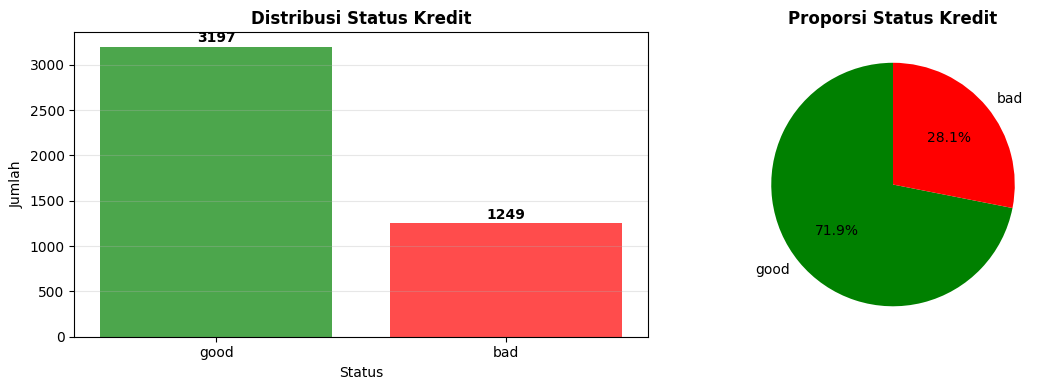


⚠ INSIGHT: Dataset memiliki class imbalance (good > bad)


In [11]:
### VISUALISASI DISTRIBUSI TARGET

#membuat grafik kanvasnya (1 baris, 2 kolom)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar plot
#menampilkan jumlah data untuk setiap kelas status
axes[0].bar(status_counts.index, status_counts.values, color=['green', 'red'], alpha=0.7)

#label untuk judul dan sumbu
axes[0].set_title('Distribusi Status Kredit', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Jumlah')
axes[0].grid(axis='y', alpha=0.3)

# menampilkan angka di atas bar
for i, (idx, val) in enumerate(status_counts.items()): #enumerate = menambahkan no.urut otomatis pada grafik batang
    axes[0].text(i, val +50, str(val), ha='center', fontweight='bold')

# Pie chart untuk persentase proporsi kelas
axes[1].pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%',
            colors=['green', 'red'], startangle=90)
axes[1].set_title('Proporsi Status Kredit', fontsize=12, fontweight='bold')

plt.tight_layout() #agar grafik tidak tumpang tindih
plt.show() #tampilkan grafik

print("\n⚠ INSIGHT: Dataset memiliki class imbalance (good > bad)")


Hasil eksekusi kado di atas adalah tampilan grafik

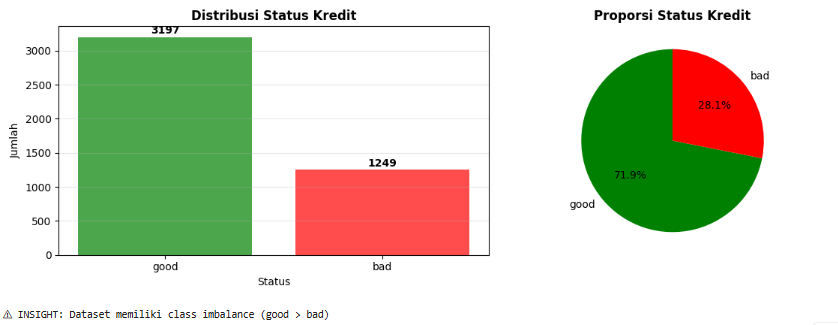

In [ ]:
Hasil eksekusi kode di atas adalah tampilan grafik berikut


In [12]:
### Statistik Variabel Keuangan Utama

print("\n" + "="*80)
print("STATISTIK VARIABEL KEUANGAN UTAMA")
print("="*80)

#variabel inti analisis risiko kredit
key_features = ['Income', 'Expenses', 'Assets', 'Debt', 'Amount', 'Savings']

#loop variabel untuk pengecekan isi kolom
for feature in key_features:
    if feature in df.columns:
        print(f"\n{feature}:")
        print(f"  Mean   : {df[feature].mean():.2f}") #2f= 2 angka desimal
        print(f"  Median : {df[feature].median():.2f}")
        print(f"  Std    : {df[feature].std():.2f}")
        print(f"  Min    : {df[feature].min():.2f}")
        print(f"  Max    : {df[feature].max():.2f}")



STATISTIK VARIABEL KEUANGAN UTAMA

Income:
  Mean   : 140.63
  Median : 124.00
  Std    : 80.18
  Min    : 1.00
  Max    : 959.00

Expenses:
  Mean   : 55.60
  Median : 51.00
  Std    : 19.52
  Min    : 35.00
  Max    : 180.00

Assets:
  Mean   : 5354.95
  Median : 3000.00
  Std    : 11534.33
  Min    : 0.00
  Max    : 300000.00

Debt:
  Mean   : 342.26
  Median : 0.00
  Std    : 1244.69
  Min    : 0.00
  Max    : 30000.00

Amount:
  Mean   : 1038.76
  Median : 1000.00
  Std    : 474.75
  Min    : 100.00
  Max    : 5000.00

Savings:
  Mean   : 3.86
  Median : 3.12
  Std    : 3.73
  Min    : -8.16
  Max    : 33.25


In [13]:
### Perbandingan Good vs Bad

print("\n" + "="*80)
print("PERBANDINGAN: GOOD vs BAD CREDIT")
print("="*80)

#fitur pembanding utama risiko gagal bayar
comparison_features = ['Income', 'Assets', 'Debt', 'Savings']

for feature in comparison_features:
    if feature in df.columns:
        print(f"\n{feature}:")
        #agregasi berd.status :
        grouped = df.groupby('Status')[feature].agg(['mean', 'median'])
        print(grouped)


PERBANDINGAN: GOOD vs BAD CREDIT

Income:
              mean  median
Status                    
bad     122.113691   101.0
good    147.863622   130.0

Assets:
               mean  median
Status                     
bad     3560.735789     0.0
good    6055.909916  4000.0

Debt:
              mean  median
Status                    
bad     362.979984     0.0
good    334.161089     0.0

Savings:
            mean    median
Status                    
bad     2.754223  2.181818
good    4.292119  3.480000


Dari tahap 3, dataset menunjukkan ketidakseimbangan kelas (class imbalance), dengan sekitar 72% kredit good dan 28% kredit bad.

Secara statistik, nasabah dengan status good memiliki rata-rata pendapatan dan aset yang lebih tinggi, serta tingkat utang yang lebih rendah dibandingkan nasabah bad. Hal ini menegaskan bahwa variabel keuangan memiliki peran penting dalam menentukan status kredit dan layak digunakan pada tahap pemodelan selanjutnya.

# 4. DATASET PREPARATION

Berisi langkah memeriksa keseimbangan dataset dan cara pencegahan ketidakseimbangan dataset untuk metode klasifikasi, lalu melakukan spliting dengan proporsi 70:30 untuk data training dan testing

In [14]:
### Pemeriksaan Keseimbangan Dataset

#IMPORT MODEL MACHINE LEARNING
from sklearn.model_selection import train_test_split #untuk membagi data latih dan data uji
from sklearn.preprocessing import LabelEncoder #untuk mengubah data kategori menjadi angka

print("="*80)
print("BAGIAN 4: DATASET PREPARATION")
print("="*80)

print("\n### LANGKAH 1: PEMERIKSAAN KESEIMBANGAN DATASET ###")

#menghitung jumlah data dan persentasi untuk tiap kelas pd variabel
status_dist = df['Status'].value_counts() #jumlah data
status_pct = df['Status'].value_counts(normalize=True) * 100 #persentase data

print("\nDistribusi Kelas:")
for status in status_dist.index:
    print(f"  {status:5s}: {status_dist[status]:4d} ({status_pct[status]:.2f}%)")

# Hitung imbalance ratio
majority_count = status_dist.max()
minority_count = status_dist.min()
imbalance_ratio = majority_count / minority_count

print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")
print(f"⚠ Dataset TIDAK SEIMBANG (majority class {imbalance_ratio:.1f}x lebih banyak)")


BAGIAN 4: DATASET PREPARATION

### LANGKAH 1: PEMERIKSAAN KESEIMBANGAN DATASET ###

Distribusi Kelas:
  good : 3197 (71.91%)
  bad  : 1249 (28.09%)

Imbalance Ratio: 2.56:1
⚠ Dataset TIDAK SEIMBANG (majority class 2.6x lebih banyak)


In [15]:
### Cara Pencegahan Ketidakseimbangan
print("\n### LANGKAH 2: CARA PENCEGAHAN KETIDAKSEIMBANGAN ###")

print("\nMetode yang dipilih:")
print("1. ✓ class_weight ='balanced' pada model")
print("   → Memberikan bobot lebih besar pada kelas minoritas (bad)")
print("   → Model akan lebih sensitif mendeteksi nasabah berisiko")
print("")
print("2. ✓ stratify pada train_test_split")
print("   → Menjaga proporsi kelas tetap sama di training dan testing")
print("   → Mencegah bias pada satu subset")
print("")
print("📌 Penjelasan:")
print("Dengan 2 metode ini, model akan:")
print("- Tidak terlalu fokus pada kelas mayoritas (good)")
print("- Belajar mendeteksi kelas minoritas (bad) dengan lebih baik")
print("- Mengurangi risiko bad credit yang lolos prediksi")



### LANGKAH 2: CARA PENCEGAHAN KETIDAKSEIMBANGAN ###

Metode yang dipilih:
1. ✓ class_weight ='balanced' pada model
   → Memberikan bobot lebih besar pada kelas minoritas (bad)
   → Model akan lebih sensitif mendeteksi nasabah berisiko

2. ✓ stratify pada train_test_split
   → Menjaga proporsi kelas tetap sama di training dan testing
   → Mencegah bias pada satu subset

📌 Penjelasan:
Dengan 2 metode ini, model akan:
- Tidak terlalu fokus pada kelas mayoritas (good)
- Belajar mendeteksi kelas minoritas (bad) dengan lebih baik
- Mengurangi risiko bad credit yang lolos prediksi


In [16]:
### Persiapan Fitur dan Target

print("\n### LANGKAH 3: PERSIAPAN FITUR DAN TARGET ###")

# Encode target variable
le_status = LabelEncoder() #mengubah label teks menjadi angka
# ubah kolom status jadi angka
y = le_status.fit_transform(df['Status'])  # good -> 0, bad -> 1

print("\nEncoding Target Variable:")
print("  good → 0")
print("  bad  → 1")

# Pilih fitur numerik sederhana untuk pemula
feature_cols = [
    'Seniority',    # Lama bekerja
    'Time',         # Durasi pinjaman
    'Age',          # Usia
    'Expenses',     # Pengeluaran
    'Income',       # Pendapatan
    'Assets',       # Aset
    'Debt',         # Hutang
    'Amount',       # Jumlah pinjaman
    'Price'         # Total harga
]

X = df[feature_cols]

print(f"\nJumlah fitur yang digunakan: {len(feature_cols)}")
print("Fitur-fitur:")
for i, col in enumerate(feature_cols, 1):
    print(f"  {i}. {col}")


### LANGKAH 3: PERSIAPAN FITUR DAN TARGET ###

Encoding Target Variable:
  good → 0
  bad  → 1

Jumlah fitur yang digunakan: 9
Fitur-fitur:
  1. Seniority
  2. Time
  3. Age
  4. Expenses
  5. Income
  6. Assets
  7. Debt
  8. Amount
  9. Price


In [17]:
### Data Splitting 70:30

print("\n### LANGKAH 4: DATA SPLITTING (70:30) ###")

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% untuk testing, 70% untuk training
    random_state=42,      # Untuk reproducibility
    stratify=y            # Jaga proporsi kelas
)

print("\nHasil Splitting:")
#menampilkan jumlah dan persentase data train dan data test
print(f"  Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Testing set : {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nDistribusi Kelas di Training Set:")
train_dist = pd.Series(y_train).value_counts() #Menghitung jumlah kelas good dan bad pada data training.
for label, count in train_dist.items():
    status_name = 'good' if label == 0 else 'bad'
    print(f"  {status_name:6s}: {count} ({count/len(y_train)*100:.1f}%)")

print("\nDistribusi Kelas di Testing Set:")
test_dist = pd.Series(y_test).value_counts()
for label, count in test_dist.items():
    status_name = 'good' if label == 0 else 'bad'
    print(f"  {status_name:6s}: {count} ({count/len(y_test)*100:.1f}%)")

print("\n✓ Dataset preparation selesai!")
print("✓ Proporsi kelas sama di training dan testing (berkat stratify)")


### LANGKAH 4: DATA SPLITTING (70:30) ###

Hasil Splitting:
  Training set: 3112 samples (70.0%)
  Testing set : 1334 samples (30.0%)

Distribusi Kelas di Training Set:
  bad   : 2238 (71.9%)
  good  : 874 (28.1%)

Distribusi Kelas di Testing Set:
  bad   : 959 (71.9%)
  good  : 375 (28.1%)

✓ Dataset preparation selesai!
✓ Proporsi kelas sama di training dan testing (berkat stratify)


- Dataset menunjukkan ketidakseimbangan kelas, dengan sekitar 72% data kredit good dan 28% bad.
- Untuk mengurangi dampak ketidakseimbangan, proporsi kelas dijaga tetap sama saat pembagian data menggunakan stratify, serta akan digunakan class_weight='balanced' pada tahap pemodelan.
- Dataset kemudian dibagi menjadi 70% data latih dan 30% data uji.


# 5. MODELLING AND EVALUATION

Langkah pemodelan Random Forest Classifier dan evaluasi hasilnya dengan menggunakan metrik klasifikasi, yaitu confusion matrics

In [18]:
### Build Baseline Model

#import library untuk evaluasi dan model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

print("="*80)
print("BAGIAN 5: MODELING DAN EVALUATION")
print("="*80)

#membuat parameter yang akan digunakan
print("\n### BASELINE MODEL: RANDOM FOREST ###")
print("\nParameter Model:")
print("  - n_estimators: 100 (jumlah tree)")
print("  - random_state: 42 (untuk reproducibility)")
print("  - class_weight: 'balanced' (untuk handle imbalance)")

# Inisialisasi model
rf_baseline = RandomForestClassifier(
    n_estimators=100, #model terdiri dari 100 decision tree
    random_state=42,
    class_weight='balanced', #menyesuaikan bobot kelas agar tdk bias
    n_jobs=-1
)

print("\nTraining model...")
rf_baseline.fit(X_train, y_train) #(fitur nasabah, label good/bad)
print("✓ Training selesai!")

# Prediksi Data Test
y_pred_base = rf_baseline.predict(X_test)
y_proba_base = rf_baseline.predict_proba(X_test)[:, 1]  # probabilitas untuk class 1 (bad)


BAGIAN 5: MODELING DAN EVALUATION

### BASELINE MODEL: RANDOM FOREST ###

Parameter Model:
  - n_estimators: 100 (jumlah tree)
  - random_state: 42 (untuk reproducibility)
  - class_weight: 'balanced' (untuk handle imbalance)

Training model...
✓ Training selesai!


In [23]:
### Evaluasi dengan Confusion Matrix
print("\n" + "="*80)
print("EVALUASI MODEL: CONFUSION MATRIX")
print("="*80)
cm_base = confusion_matrix(y_test, y_pred_base)

print("\nConfusion Matrix:")
print("                Predicted" )
print("               Good    Bad")
print(f"Actual Good  [{cm_base[0,0]:5d}] [{cm_base[0,1]:5d}]")
print(f"        Bad  [{cm_base[1,0]:5d}] [{cm_base[1,1]:5d}]")

# Interpretasi
tn, fp, fn, tp = cm_base.ravel()
print("\nInterpretasi:")
print(f"  True Negative  (TN): {tn} - Hasil Good diprediksi Good ✓")
print(f"  False Positive (FP): {fp} - Hasil Good diprediksi Bad ✗")
print(f"  False Negative (FN): {fn} - Hasil Bad diprediksi Good ✗ (BAHAYA!)")
print(f"  True Positive  (TP): {tp} - Hasil Bad diprediksi Bad ✓")



EVALUASI MODEL: CONFUSION MATRIX

Confusion Matrix:
                Predicted
               Good    Bad
Actual Good  [  130] [  245]
        Bad  [  110] [  849]

Interpretasi:
  True Negative  (TN): 130 - Hasil Good diprediksi Good ✓
  False Positive (FP): 245 - Hasil Good diprediksi Bad ✗
  False Negative (FN): 110 - Hasil Bad diprediksi Good ✗ (BAHAYA!)
  True Positive  (TP): 849 - Hasil Bad diprediksi Bad ✓


Hasil eksekusi kode

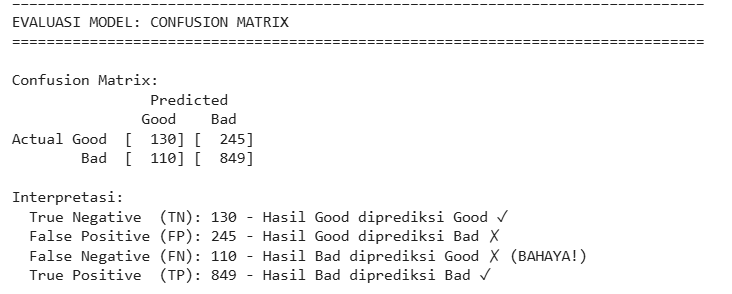

In [25]:
### Metrik Klasifikasi
print("\n" + "="*80)
print("METRIK KLASIFIKASI")
print("="*80)

acc_base = accuracy_score(y_test, y_pred_base) #persentase prediksi yg benar scr keseluruhan
prec_base = precision_score(y_test, y_pred_base) #yg paling benar bad
rec_base = recall_score(y_test, y_pred_base) #bad yg berhasl terdeteksi
f1_base = f1_score(y_test, y_pred_base) #keseimbangan precision dan recall
auc_base = roc_auc_score(y_test, y_proba_base) #membedakan good vs bad pd threshold

print("\nMetrik Utama:")
print(f"  Accuracy  : {acc_base:.4f} - % prediksi yang benar")
print(f"  Precision : {prec_base:.4f} - Dari prediksi bad, berapa yang benar bad")
print(f"  Recall    : {rec_base:.4f} - Dari actual bad, berapa yang terdeteksi")
print(f"  F1-Score  : {f1_base:.4f} - Harmonic mean Precision & Recall")
print(f"  AUC-ROC   : {auc_base:.4f} - Kemampuan pisahkan good vs bad")

print("\n📌 PENTING untuk Credit Scoring:")
print("  - RECALL tinggi = mendeteksi lebih banyak bad credit")
print("  - AUC tinggi = model bisa membedakan good vs bad dengan baik")



METRIK KLASIFIKASI

Metrik Utama:
  Accuracy  : 0.7339 - % prediksi yang benar
  Precision : 0.7761 - Dari prediksi bad, berapa yang benar bad
  Recall    : 0.8853 - Dari actual bad, berapa yang terdeteksi
  F1-Score  : 0.8271 - Harmonic mean Precision & Recall
  AUC-ROC   : 0.7506 - Kemampuan pisahkan good vs bad

📌 PENTING untuk Credit Scoring:
  - RECALL tinggi = mendeteksi lebih banyak bad credit
  - AUC tinggi = model bisa membedakan good vs bad dengan baik


Hasil eksekusi kode

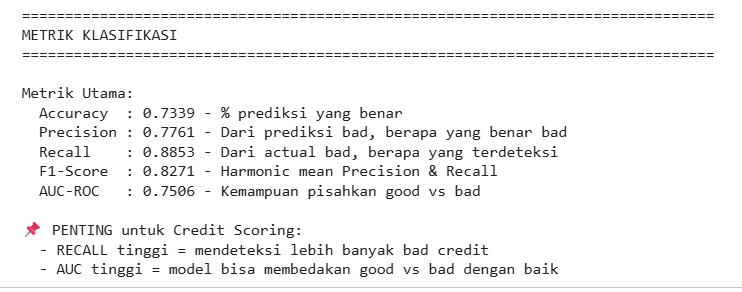

In [26]:
### Classification Report

print("\n" + "="*80)
print("CLASSIFICATION REPORT")
print("="*80)
print(classification_report(y_test, y_pred_base,
                          target_names=['good (0)', 'bad (1)']))

print("✓ Modeling dan evaluation selesai!")


CLASSIFICATION REPORT
              precision    recall  f1-score   support

    good (0)       0.54      0.35      0.42       375
     bad (1)       0.78      0.89      0.83       959

    accuracy                           0.73      1334
   macro avg       0.66      0.62      0.62      1334
weighted avg       0.71      0.73      0.71      1334

✓ Modeling dan evaluation selesai!


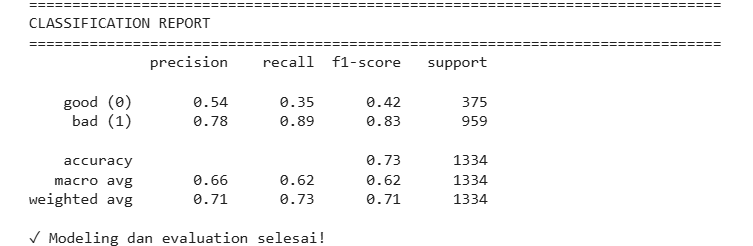


Dari tahap 5 modelling dan evaluation, model random forest yang dipilih, dilatih dengan parameter class_weight='balanced' untuk mempertimbangkan ketidakseimbangan kelas.
Confusion matrix dan metrik klasifikasi untuk evaluasi model, digunakan untuk menunjukkan jumlah prediksi benar/salah, yang diperoleh hasil bahwa :
- Recall: tinggi → deteksi bad credit lebih baik (minimasi FN)
- model baseline nilai AUC-ROC menunjukkan kemampuan model bisa memisahkan kelas dengan cukup baik

# 6. DATA VISUALIZATION

Langkah visualisasi data yang diperlukan untuk menjelaskan model dan evaluasinya

BAGIAN 6: DATA VISUALISATION

### VISUALISASI 1: CONFUSION MATRIX ###


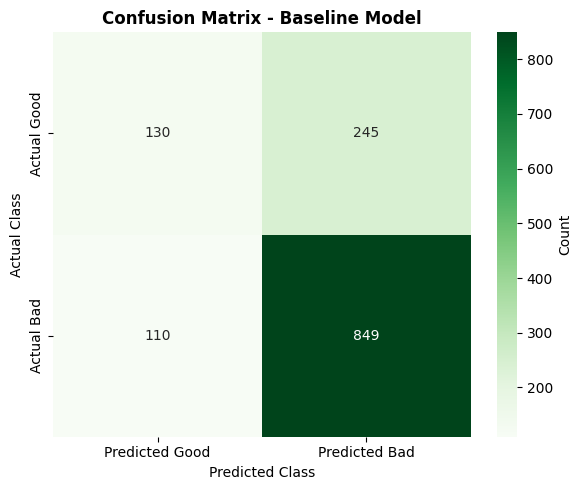


 Keterangan :
  - Diagonal hijau tua = prediksi BENAR
  - Off-diagonal       = prediksi SALAH
  - Bawah kiri (False Negative) paling berbahaya untuk bank!


In [37]:
### Visualisasi 1 Confusion Matrix
#IMPORT LIBRARY VISUALISASI
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("BAGIAN 6: DATA VISUALISATION")
print("="*80)

print("\n### VISUALISASI 1: CONFUSION MATRIX ###")

fig, ax = plt.subplots(figsize=(6, 5)) #kanvas uk.6x5 inci
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Good', 'Predicted Bad'], #sumbu x -> hasil prediksi model
            yticklabels=['Actual Good', 'Actual Bad'], #sumbu Y -> kelas aktual
            cbar_kws={'label': 'Count'}) #color bar
ax.set_title('Confusion Matrix - Baseline Model', fontsize=12, fontweight='bold')
ax.set_ylabel('Actual Class')
ax.set_xlabel('Predicted Class')
plt.tight_layout()
plt.show()

print("\n Keterangan :")
print("  - Diagonal hijau tua = prediksi BENAR")
print("  - Off-diagonal       = prediksi SALAH")
print("  - Bawah kiri (False Negative) paling berbahaya untuk bank!")


Hasil eksekusi kode tersebut adalah seperti tampilan berikut:

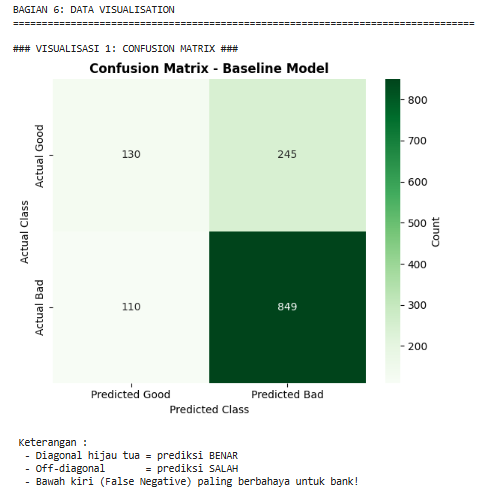


### VISUALISASI 2: ROC CURVE ###


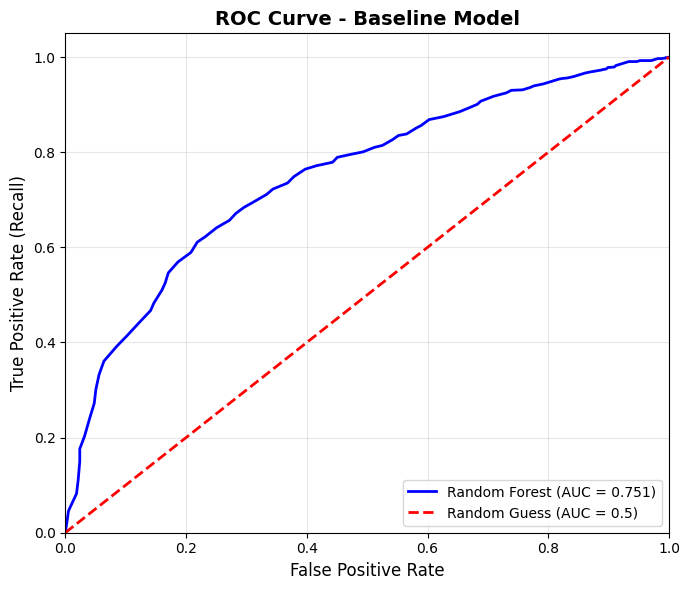


 Keterangan :
  - Garis biru = performa model kita
  - Garis merah putus = random guess
  - Makin ke kiri atas = makin bagus
  - AUC = 0.751 → model CUKUP


In [38]:
### Visualisasi 2 ROC Curve
print("\n### VISUALISASI 2: ROC CURVE ###")

# ROC curve, dgn nilai auc_base dari tahap 5
fpr_base, tpr_base, thresholds = roc_curve(y_test, y_proba_base)

fig, ax = plt.subplots(figsize=(7, 6))
#plot ROC model
ax.plot(fpr_base, tpr_base, color='blue', lw=2,
        label=f'Random Forest (AUC = {auc_base:.3f})')

#plot garis random guess sbg baseline pembanding
ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--',
        label='Random Guess (AUC = 0.5)')

#setting axis
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])

#set judul dan label
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate (Recall)', fontsize=12)
ax.set_title('ROC Curve - Baseline Model', fontsize=14, fontweight='bold')

ax.legend(loc='lower right')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n Keterangan :")
print("  - Garis biru = performa model kita")
print("  - Garis merah putus = random guess")
print("  - Makin ke kiri atas = makin bagus")
print(f"  - AUC = {auc_base:.3f} → model {'BAIK' if auc_base > 0.8 else 'CUKUP'}")


hasil eksekusi kode menampilkan visualisasi grafik berikut

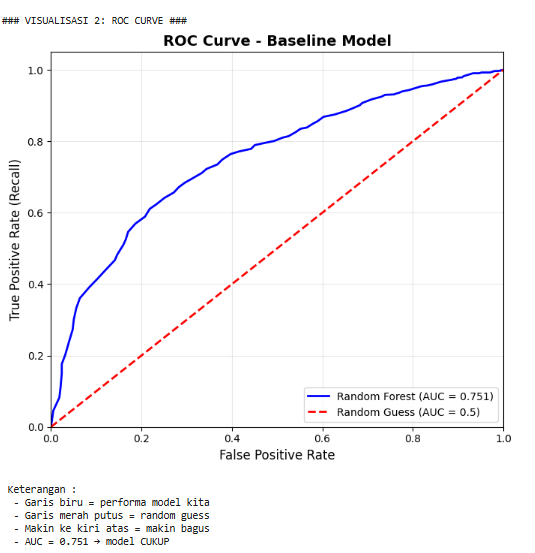


### VISUALISASI 3: PERFORMANCE METRICS ###


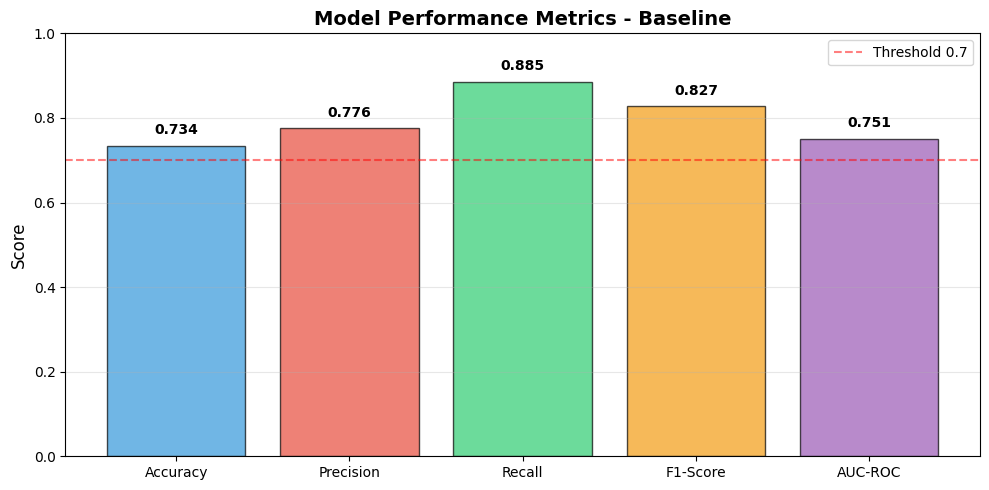


✓ Visualisasi selesai!


In [ ]:
### Visualisasi 3 Metrik Performance

print("\n### VISUALISASI 3: PERFORMANCE METRICS ###")

#daftar metrik yang akan ditampilkan pada bar chart
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
metrics_values = [acc_base, prec_base, rec_base, f1_base, auc_base]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']

# membuat bar chart
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(metrics_names, metrics_values, color=colors, alpha=0.7, edgecolor='black')

ax.set_ylim([0, 1])
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Metrics - Baseline', fontsize=14, fontweight='bold')

ax.axhline(y=0.7, color='red', linestyle='--', alpha=0.5, label='Threshold 0.7')
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Visualisasi selesai!")

Hasil eksekusi kode adalah sebagai berikut

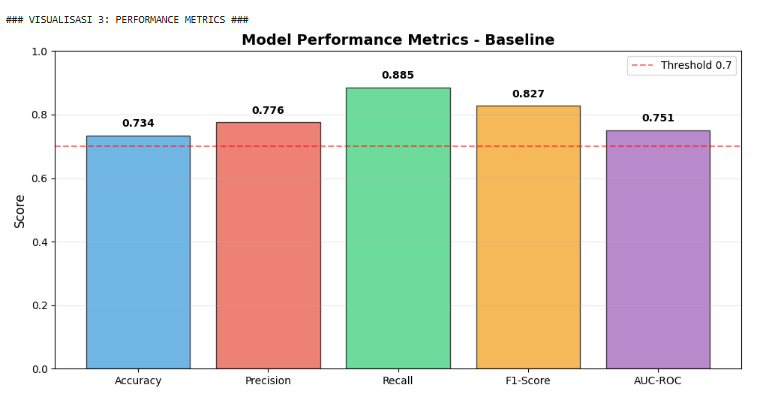

Dari tahap 6 yang dilakukan, diperoleh visualisasi yang bisa membantu memahami model berdasarkan perhitungan dan prediksi yang telah dilakukan

Confusion matrix → kesalahan kritis (FN)

ROC curve → kemampuan pemisahan kelas

Bar chart → perbandingan performa metrik

# 7. MODEL DEPLOYMENT AND TEST

In [ ]:
### Simpan Model

# import library untuk menyimpan objek python besar untuk model ML
import joblib

print("="*80)
print("BAGIAN 7: MODEL DEPLOYMENT AND TEST")
print("="*80)

print("\n### LANGKAH 1: SIMPAN MODEL ###")

model_filename = 'rf_credit_baseline.pkl'
joblib.dump(rf_baseline, model_filename)
print(f"✓ Model disimpan ke: {model_filename}")

# Simpan juga feature names dan label encoder
feature_names_file = 'feature_names.pkl'
joblib.dump(feature_cols, feature_names_file)
print(f"✓ Feature names disimpan ke: {feature_names_file}")

label_encoder_file = 'label_encoder.pkl'
joblib.dump(le_status, label_encoder_file)
print(f"✓ Label encoder disimpan ke: {label_encoder_file}")

BAGIAN 7: MODEL DEPLOYMENT AND TEST

### LANGKAH 1: SIMPAN MODEL ###
✓ Model disimpan ke: rf_credit_baseline.pkl
✓ Feature names disimpan ke: feature_names.pkl
✓ Label encoder disimpan ke: label_encoder.pkl


In [ ]:
### Kode: Load Model

print("\n### LANGKAH 2: LOAD MODEL KEMBALI ###")

loaded_model = joblib.load(model_filename)
loaded_features = joblib.load(feature_names_file)
loaded_le = joblib.load(label_encoder_file)

print("✓ Model berhasil di-load kembali")
print("✓ Siap digunakan untuk prediksi data baru")


### LANGKAH 2: LOAD MODEL KEMBALI ###
✓ Model berhasil di-load kembali
✓ Siap digunakan untuk prediksi data baru


In [ ]:
### Kode: Test dengan Data Baru

print("\n### LANGKAH 3: TEST DENGAN DATA BARU ###")
print("\nCatatan: Data baru ini TIDAK TERMASUK dalam training atau testing")

# BUAT 3 PROFILE PEMOHON BARU (SIMULASI)
new_applicants = pd.DataFrame([
    {
        'Seniority': 8,
        'Time': 60,
        'Age': 35,
        'Expenses': 65,
        'Income': 200,
        'Assets': 10000,
        'Debt': 500,
        'Amount': 1500,
        'Price': 1800
    },
    {
        'Seniority': 2,
        'Time': 36,
        'Age': 25,
        'Expenses': 80,
        'Income': 90,
        'Assets': 0,
        'Debt': 3000,
        'Amount': 1200,
        'Price': 1500
    },
    {
        'Seniority': 5,
        'Time': 48,
        'Age': 40,
        'Expenses': 70,
        'Income': 150,
        'Assets': 5000,
        'Debt': 1000,
        'Amount': 1000,
        'Price': 1300
    }
])

print("\nPROFILE PEMOHON BARU:")
print(new_applicants[['Income', 'Assets', 'Debt', 'Amount']].to_string(index=False))


### Kode: Prediksi Data Baru

print("\n" + "="*70)
print("HASIL PREDIKSI UNTUK DATA BARU")
print("="*70)

# Prediksi dengan model yang sudah di-load
new_pred = loaded_model.predict(new_applicants)
new_proba = loaded_model.predict_proba(new_applicants)

for i in range(len(new_applicants)):
    pred_label = loaded_le.inverse_transform([new_pred[i]])[0]
    prob_good = new_proba[i, 0]
    prob_bad = new_proba[i, 1]

    print(f"\n--- PEMOHON {i+1} ---")
    print(f"Income: {new_applicants.iloc[i]['Income']}, Assets: {new_applicants.iloc[i]['Assets']}, Debt: {new_applicants.iloc[i]['Debt']}")
    print(f"PREDIKSI: {pred_label.upper()}")
    print(f"Probabilitas Good: {prob_good:.3f} ({prob_good*100:.1f}%)")
    print(f"Probabilitas Bad : {prob_bad:.3f} ({prob_bad*100:.1f}%)")

    # Rekomendasi
    if pred_label == 'good' and prob_good > 0.8:
        recommendation = "✅ DISETUJUI - Risiko rendah"
    elif pred_label == 'good' and prob_good > 0.6:
        recommendation = "⚠️ PERTIMBANGKAN - Risiko sedang"
    elif pred_label == 'bad' and prob_bad > 0.7:
        recommendation = "❌ DITOLAK - Risiko tinggi"
    else:
        recommendation = "⚠️ REVIEW MANUAL - Tidak pasti"

    print(f"Rekomendasi: {recommendation}")

print("\n✓ Model deployment dan testing selesai!")


### LANGKAH 3: TEST DENGAN DATA BARU ###

Catatan: Data baru ini TIDAK TERMASUK dalam training atau testing

PROFILE PEMOHON BARU:
 Income  Assets  Debt  Amount
    200   10000   500    1500
     90       0  3000    1200
    150    5000  1000    1000

HASIL PREDIKSI UNTUK DATA BARU

--- PEMOHON 1 ---
Income: 200, Assets: 10000, Debt: 500
PREDIKSI: GOOD
Probabilitas Good: 0.030 (3.0%)
Probabilitas Bad : 0.970 (97.0%)
Rekomendasi: ⚠️ REVIEW MANUAL - Tidak pasti

--- PEMOHON 2 ---
Income: 90, Assets: 0, Debt: 3000
PREDIKSI: BAD
Probabilitas Good: 0.550 (55.0%)
Probabilitas Bad : 0.450 (45.0%)
Rekomendasi: ⚠️ REVIEW MANUAL - Tidak pasti

--- PEMOHON 3 ---
Income: 150, Assets: 5000, Debt: 1000
PREDIKSI: GOOD
Probabilitas Good: 0.130 (13.0%)
Probabilitas Bad : 0.870 (87.0%)
Rekomendasi: ⚠️ REVIEW MANUAL - Tidak pasti

✓ Model deployment dan testing selesai!


In [ ]:
## **BAGIAN 8: SKENARIO 1 HYPERPARAMETER TUNING**

print("="*70)
print("BAGIAN 8: HYPERPARAMETER TUNING - SKENARIO 1")
print("="*70)

print("\nParameter yang akan di-tuning:")
print("  a = n_estimators    (jumlah tree)")
print("  b = max_depth       (kedalaman tree)")
print("  c = min_samples_split (minimal split)")

print("\n--- SKENARIO 1: a=100, b=10, c=2 ---")

rf_s1 = RandomForestClassifier(
    n_estimators=100,      # a
    max_depth=10,         # b
    min_samples_split=2,  # c
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

print("Training Skenario 1...")
rf_s1.fit(X_train, y_train)

y_pred_s1 = rf_s1.predict(X_test)
y_proba_s1 = rf_s1.predict_proba(X_test)[:, 1]

# Evaluasi
acc_s1 = accuracy_score(y_test, y_pred_s1)
prec_s1 = precision_score(y_test, y_pred_s1)
rec_s1 = recall_score(y_test, y_pred_s1)
f1_s1 = f1_score(y_test, y_pred_s1)
auc_s1 = roc_auc_score(y_test, y_proba_s1)

print("\n✓ Training selesai")
print("\nHASIL EVALUASI SKENARIO 1:")
print(f"  Accuracy  : {acc_s1:.4f}")
print(f"  Precision : {prec_s1:.4f}")
print(f"  Recall    : {rec_s1:.4f}")
print(f"  F1-Score  : {f1_s1:.4f}")
print(f"  AUC-ROC   : {auc_s1:.4f}")

# Confusion Matrix
cm_s1 = confusion_matrix(y_test, y_pred_s1)
print("\nConfusion Matrix:")
print(cm_s1)

BAGIAN 8: HYPERPARAMETER TUNING - SKENARIO 1

Parameter yang akan di-tuning:
  a = n_estimators    (jumlah tree)
  b = max_depth       (kedalaman tree)
  c = min_samples_split (minimal split)

--- SKENARIO 1: a=100, b=10, c=2 ---
Training Skenario 1...

✓ Training selesai

HASIL EVALUASI SKENARIO 1:
  Accuracy  : 0.7354
  Precision : 0.8150
  Recall    : 0.8175
  F1-Score  : 0.8162
  AUC-ROC   : 0.7565

Confusion Matrix:
[[197 178]
 [175 784]]


In [ ]:
## **BAGIAN 9: SKENARIO 2 HYPERPARAMETER TUNING**

print("\n" + "="*70)
print("BAGIAN 9: HYPERPARAMETER TUNING - SKENARIO 2")
print("="*70)

print("\n--- SKENARIO 2: a=200, b=15, c=5 ---")

rf_s2 = RandomForestClassifier(
    n_estimators=200,      # a (lebih banyak tree)
    max_depth=15,         # b (lebih dalam)
    min_samples_split=5,  # c (lebih konservatif)
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

print("Training Skenario 2...")
rf_s2.fit(X_train, y_train)

y_pred_s2 = rf_s2.predict(X_test)
y_proba_s2 = rf_s2.predict_proba(X_test)[:, 1]

# Evaluasi
acc_s2 = accuracy_score(y_test, y_pred_s2)
prec_s2 = precision_score(y_test, y_pred_s2)
rec_s2 = recall_score(y_test, y_pred_s2)
f1_s2 = f1_score(y_test, y_pred_s2)
auc_s2 = roc_auc_score(y_test, y_proba_s2)

print("\n✓ Training selesai")
print("\nHASIL EVALUASI SKENARIO 2:")
print(f"  Accuracy  : {acc_s2:.4f}")
print(f"  Precision : {prec_s2:.4f}")
print(f"  Recall    : {rec_s2:.4f}")
print(f"  F1-Score  : {f1_s2:.4f}")
print(f"  AUC-ROC   : {auc_s2:.4f}")

# Confusion Matrix
cm_s2 = confusion_matrix(y_test, y_pred_s2)
print("\nConfusion Matrix:")
print(cm_s2)



BAGIAN 9: HYPERPARAMETER TUNING - SKENARIO 2

--- SKENARIO 2: a=200, b=15, c=5 ---
Training Skenario 2...

✓ Training selesai

HASIL EVALUASI SKENARIO 2:
  Accuracy  : 0.7339
  Precision : 0.7909
  Recall    : 0.8561
  F1-Score  : 0.8222
  AUC-ROC   : 0.7507

Confusion Matrix:
[[158 217]
 [138 821]]


In [ ]:
## **BAGIAN 10: SKENARIO 3 HYPERPARAMETER TUNING**

print("\n" + "="*70)
print("BAGIAN 10: HYPERPARAMETER TUNING - SKENARIO 3")
print("="*70)

print("\n--- SKENARIO 3: a=300, b=None, c=2 ---")
print("(None = tree boleh sangat dalam, tidak ada batas)")

rf_s3 = RandomForestClassifier(
    n_estimators=300,      # a (banyak tree)
    max_depth=None,       # b (unlimited depth)
    min_samples_split=2,  # c (minimal constraint)
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

print("Training Skenario 3...")
rf_s3.fit(X_train, y_train)

y_pred_s3 = rf_s3.predict(X_test)
y_proba_s3 = rf_s3.predict_proba(X_test)[:, 1]

# Evaluasi
acc_s3 = accuracy_score(y_test, y_pred_s3)
prec_s3 = precision_score(y_test, y_pred_s3)
rec_s3 = recall_score(y_test, y_pred_s3)
f1_s3 = f1_score(y_test, y_pred_s3)
auc_s3 = roc_auc_score(y_test, y_proba_s3)

print("\n✓ Training selesai")
print("\nHASIL EVALUASI SKENARIO 3:")
print(f"  Accuracy  : {acc_s3:.4f}")
print(f"  Precision : {prec_s3:.4f}")
print(f"  Recall    : {rec_s3:.4f}")
print(f"  F1-Score  : {f1_s3:.4f}")
print(f"  AUC-ROC   : {auc_s3:.4f}")

# Confusion Matrix
cm_s3 = confusion_matrix(y_test, y_pred_s3)
print("\nConfusion Matrix:")
print(cm_s3)


BAGIAN 10: HYPERPARAMETER TUNING - SKENARIO 3

--- SKENARIO 3: a=300, b=None, c=2 ---
(None = tree boleh sangat dalam, tidak ada batas)
Training Skenario 3...

✓ Training selesai

HASIL EVALUASI SKENARIO 3:
  Accuracy  : 0.7406
  Precision : 0.7779
  Recall    : 0.8947
  F1-Score  : 0.8322
  AUC-ROC   : 0.7494

Confusion Matrix:
[[130 245]
 [101 858]]


In [ ]:
## **BAGIAN 11: SKENARIO 4 HYPERPARAMETER TUNING**

print("="*70)
print("BAGIAN 11: HYPERPARAMETER TUNING - SKENARIO 4")
print("="*70)

print("\n--- SKENARIO 4: a=150, b=20, c=10 ---")

rf_s4 = RandomForestClassifier(
    n_estimators=150,      # a (sedang)
    max_depth=20,         # b (cukup dalam)
    min_samples_split=10, # c (konservatif)
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

print("Training Skenario 4...")
rf_s4.fit(X_train, y_train)

y_pred_s4 = rf_s4.predict(X_test)
y_proba_s4 = rf_s4.predict_proba(X_test)[:, 1]

# Evaluasi
acc_s4 = accuracy_score(y_test, y_pred_s4)
prec_s4 = precision_score(y_test, y_pred_s4)
rec_s4 = recall_score(y_test, y_pred_s4)
f1_s4 = f1_score(y_test, y_pred_s4)
auc_s4 = roc_auc_score(y_test, y_proba_s4)

print("\n✓ Training selesai")
print("\nHASIL EVALUASI SKENARIO 4:")
print(f"  Accuracy  : {acc_s4:.4f}")
print(f"  Precision : {prec_s4:.4f}")
print(f"  Recall    : {rec_s4:.4f}")
print(f"  F1-Score  : {f1_s4:.4f}")
print(f"  AUC-ROC   : {auc_s4:.4f}")

# Confusion Matrix
cm_s4 = confusion_matrix(y_test, y_pred_s4)
print("\nConfusion Matrix:")
print(cm_s4)


BAGIAN 11: HYPERPARAMETER TUNING - SKENARIO 4

--- SKENARIO 4: a=150, b=20, c=10 ---
Training Skenario 4...

✓ Training selesai

HASIL EVALUASI SKENARIO 4:
  Accuracy  : 0.7256
  Precision : 0.8054
  Recall    : 0.8154
  F1-Score  : 0.8104
  AUC-ROC   : 0.7530

Confusion Matrix:
[[186 189]
 [177 782]]


In [ ]:
## **BAGIAN 12: SKENARIO 5 HYPERPARAMETER TUNING**

print("\n" + "="*70)
print("BAGIAN 12: HYPERPARAMETER TUNING - SKENARIO 5")
print("="*70)

print("\n--- SKENARIO 5: a=100, b=None, c=5 ---")

rf_s5 = RandomForestClassifier(
    n_estimators=100,      # a (default)
    max_depth=None,       # b (unlimited)
    min_samples_split=5,  # c (sedang)
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

print("Training Skenario 5...")
rf_s5.fit(X_train, y_train)

y_pred_s5 = rf_s5.predict(X_test)
y_proba_s5 = rf_s5.predict_proba(X_test)[:, 1]

# Evaluasi
acc_s5 = accuracy_score(y_test, y_pred_s5)
prec_s5 = precision_score(y_test, y_pred_s5)
rec_s5 = recall_score(y_test, y_pred_s5)
f1_s5 = f1_score(y_test, y_pred_s5)
auc_s5 = roc_auc_score(y_test, y_proba_s5)

print("\n✓ Training selesai")
print("\nHASIL EVALUASI SKENARIO 5:")
print(f"  Accuracy  : {acc_s5:.4f}")
print(f"  Precision : {prec_s5:.4f}")
print(f"  Recall    : {rec_s5:.4f}")
print(f"  F1-Score  : {f1_s5:.4f}")
print(f"  AUC-ROC   : {auc_s5:.4f}")

# Confusion Matrix
cm_s5 = confusion_matrix(y_test, y_pred_s5)
print("\nConfusion Matrix:")
print(cm_s5)



BAGIAN 12: HYPERPARAMETER TUNING - SKENARIO 5

--- SKENARIO 5: a=100, b=None, c=5 ---
Training Skenario 5...

✓ Training selesai

HASIL EVALUASI SKENARIO 5:
  Accuracy  : 0.7361
  Precision : 0.7866
  Recall    : 0.8686
  F1-Score  : 0.8256
  AUC-ROC   : 0.7488

Confusion Matrix:
[[149 226]
 [126 833]]


In [ ]:
## **BAGIAN 13: SKENARIO 6 HYPERPARAMETER TUNING**

print("\n" + "="*70)
print("BAGIAN 13: HYPERPARAMETER TUNING - SKENARIO 6")
print("="*70)

print("\n--- SKENARIO 6: a=250, b=25, c=15 ---")

rf_s6 = RandomForestClassifier(
    n_estimators=250,      # a (banyak)
    max_depth=25,         # b (sangat dalam)
    min_samples_split=15, # c (sangat konservatif)
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

print("Training Skenario 6...")
rf_s6.fit(X_train, y_train)

y_pred_s6 = rf_s6.predict(X_test)
y_proba_s6 = rf_s6.predict_proba(X_test)[:, 1]

# Evaluasi
acc_s6 = accuracy_score(y_test, y_pred_s6)
prec_s6 = precision_score(y_test, y_pred_s6)
rec_s6 = recall_score(y_test, y_pred_s6)
f1_s6 = f1_score(y_test, y_pred_s6)
auc_s6 = roc_auc_score(y_test, y_proba_s6)

print("\n✓ Training selesai")
print("\nHASIL EVALUASI SKENARIO 6:")
print(f"  Accuracy  : {acc_s6:.4f}")
print(f"  Precision : {prec_s6:.4f}")
print(f"  Recall    : {rec_s6:.4f}")
print(f"  F1-Score  : {f1_s6:.4f}")
print(f"  AUC-ROC   : {auc_s6:.4f}")

# Confusion Matrix
cm_s6 = confusion_matrix(y_test, y_pred_s6)
print("\nConfusion Matrix:")
print(cm_s6)


BAGIAN 13: HYPERPARAMETER TUNING - SKENARIO 6

--- SKENARIO 6: a=250, b=25, c=15 ---
Training Skenario 6...

✓ Training selesai

HASIL EVALUASI SKENARIO 6:
  Accuracy  : 0.7264
  Precision : 0.8140
  Recall    : 0.8029
  F1-Score  : 0.8084
  AUC-ROC   : 0.7580

Confusion Matrix:
[[199 176]
 [189 770]]


In [ ]:
## **BAGIAN 14: PERBANDINGAN SEMUA SKENARIO**

print("\n" + "="*70)
print("BAGIAN 14: PERBANDINGAN SEMUA SKENARIO")
print("="*70)

# Compile hasil semua skenario
comparison_results = pd.DataFrame([
    {
        'Model': 'Baseline',
        'a (n_est)': 100,
        'b (depth)': 'Default',
        'c (split)': 2,
        'Accuracy': acc_base,
        'Precision': prec_base,
        'Recall': rec_base,
        'F1': f1_base,
        'AUC': auc_base
    },
    {
        'Model': 'Skenario 1',
        'a (n_est)': 100,
        'b (depth)': 10,
        'c (split)': 2,
        'Accuracy': acc_s1,
        'Precision': prec_s1,
        'Recall': rec_s1,
        'F1': f1_s1,
        'AUC': auc_s1
    },
    {
        'Model': 'Skenario 2',
        'a (n_est)': 200,
        'b (depth)': 15,
        'c (split)': 5,
        'Accuracy': acc_s2,
        'Precision': prec_s2,
        'Recall': rec_s2,
        'F1': f1_s2,
        'AUC': auc_s2
    },
    {
        'Model': 'Skenario 3',
        'a (n_est)': 300,
        'b (depth)': 'None',
        'c (split)': 2,
        'Accuracy': acc_s3,
        'Precision': prec_s3,
        'Recall': rec_s3,
        'F1': f1_s3,
        'AUC': auc_s3
    },
    {
        'Model': 'Skenario 4',
        'a (n_est)': 150,
        'b (depth)': 20,
        'c (split)': 10,
        'Accuracy': acc_s4,
        'Precision': prec_s4,
        'Recall': rec_s4,
        'F1': f1_s4,
        'AUC': auc_s4
    },
    {
        'Model': 'Skenario 5',
        'a (n_est)': 100,
        'b (depth)': 'None',
        'c (split)': 5,
        'Accuracy': acc_s5,
        'Precision': prec_s5,
        'Recall': rec_s5,
        'F1': f1_s5,
        'AUC': auc_s5
    },
    {
        'Model': 'Skenario 6',
        'a (n_est)': 250,
        'b (depth)': 25,
        'c (split)': 15,
        'Accuracy': acc_s6,
        'Precision': prec_s6,
        'Recall': rec_s6,
        'F1': f1_s6,
        'AUC': auc_s6
    }
])

print("\nTABEL PERBANDINGAN LENGKAP:")
print(comparison_results.to_string(index=False))


BAGIAN 14: PERBANDINGAN SEMUA SKENARIO

TABEL PERBANDINGAN LENGKAP:
     Model  a (n_est) b (depth)  c (split)  Accuracy  Precision   Recall       F1      AUC
  Baseline        100   Default          2  0.733883   0.776051 0.885297 0.827082 0.750622
Skenario 1        100        10          2  0.735382   0.814969 0.817518 0.816242 0.756460
Skenario 2        200        15          5  0.733883   0.790944 0.856100 0.822233 0.750682
Skenario 3        300      None          2  0.740630   0.777879 0.894682 0.832202 0.749413
Skenario 4        150        20         10  0.725637   0.805355 0.815433 0.810363 0.753048
Skenario 5        100      None          5  0.736132   0.786591 0.868613 0.825570 0.748798
Skenario 6        250        25         15  0.726387   0.813953 0.802920 0.808399 0.758029


In [ ]:
# Identifikasi model terbaik
print("\n" + "="*70)
print("MODEL TERBAIK BERDASARKAN METRIK")
print("="*70)

best_acc_idx = comparison_results['Accuracy'].idxmax()
best_rec_idx = comparison_results['Recall'].idxmax()
best_auc_idx = comparison_results['AUC'].idxmax()

print(f"\nBest Accuracy : {comparison_results.loc[best_acc_idx, 'Model']} ({comparison_results.loc[best_acc_idx, 'Accuracy']:.4f})")
print(f"Best Recall   : {comparison_results.loc[best_rec_idx, 'Model']} ({comparison_results.loc[best_rec_idx, 'Recall']:.4f})")
print(f"Best AUC      : {comparison_results.loc[best_auc_idx, 'Model']} ({comparison_results.loc[best_auc_idx, 'AUC']:.4f})")

# Hitung weighted score untuk memilih model terbaik overall
# Untuk credit scoring: Recall & AUC lebih penting
comparison_results['Weighted_Score'] = (
    comparison_results['Accuracy'] * 0.15 +
    comparison_results['Precision'] * 0.20 +
    comparison_results['Recall'] * 0.25 +      # Penting: deteksi bad
    comparison_results['F1'] * 0.20 +
    comparison_results['AUC'] * 0.20            # Penting: discriminative power
)

best_overall_idx = comparison_results['Weighted_Score'].idxmax()
best_model_info = comparison_results.loc[best_overall_idx]

print("\n" + "="*70)
print("🏆 MODEL TERBAIK (WEIGHTED SCORE)")
print("="*70)

print(f"\nModel Terpilih: {best_model_info['Model']}")
print(f"\nParameter:")
print(f"  n_estimators     : {best_model_info['a (n_est)']}")
print(f"  max_depth        : {best_model_info['b (depth)']}")
print(f"  min_samples_split: {best_model_info['c (split)']}")

print(f"\nPerforma:")
print(f"  Accuracy  : {best_model_info['Accuracy']:.4f}")
print(f"  Precision : {best_model_info['Precision']:.4f}")
print(f"  Recall    : {best_model_info['Recall']:.4f}")
print(f"  F1-Score  : {best_model_info['F1']:.4f}")
print(f"  AUC-ROC   : {best_model_info['AUC']:.4f}")
print(f"  Weighted  : {best_model_info['Weighted_Score']:.4f}")

print("\n✓ Hyperparameter tuning selesai!")


MODEL TERBAIK BERDASARKAN METRIK

Best Accuracy : Skenario 3 (0.7406)
Best Recall   : Skenario 3 (0.8947)
Best AUC      : Skenario 6 (0.7580)

🏆 MODEL TERBAIK (WEIGHTED SCORE)

Model Terpilih: Skenario 3

Parameter:
  n_estimators     : 300
  max_depth        : None
  min_samples_split: 2

Performa:
  Accuracy  : 0.7406
  Precision : 0.7779
  Recall    : 0.8947
  F1-Score  : 0.8322
  AUC-ROC   : 0.7494
  Weighted  : 0.8067

✓ Hyperparameter tuning selesai!



### VISUALISASI PERBANDINGAN ###


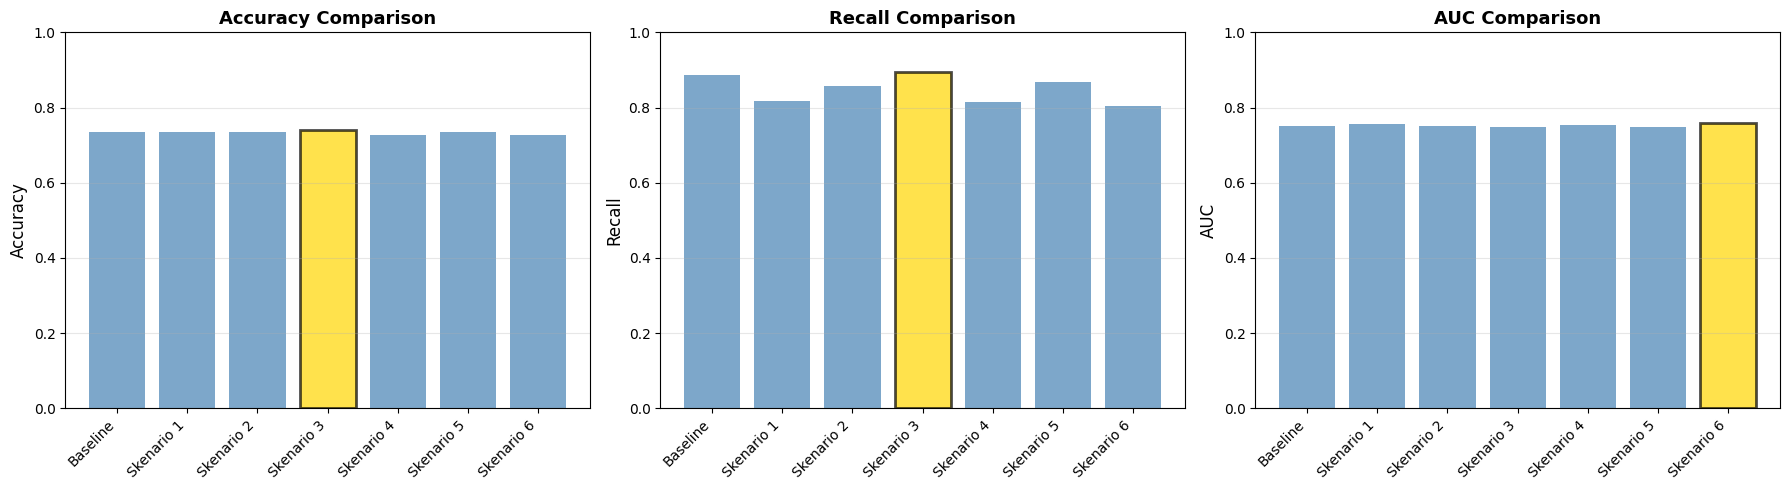


📊 Model dengan bar EMAS adalah yang terbaik untuk metrik tersebut


In [ ]:
### Visualisasi Perbandingan

print("\n### VISUALISASI PERBANDINGAN ###")

# Bar chart comparison
metrics_to_plot = ['Accuracy', 'Recall', 'AUC']
x_pos = np.arange(len(comparison_results))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, metric in enumerate(metrics_to_plot):
    axes[idx].bar(x_pos, comparison_results[metric], alpha=0.7, color='steelblue')
    axes[idx].set_xticks(x_pos)
    axes[idx].set_xticklabels(comparison_results['Model'], rotation=45, ha='right')
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].set_title(f'{metric} Comparison', fontsize=13, fontweight='bold')
    axes[idx].set_ylim([0, 1])
    axes[idx].grid(axis='y', alpha=0.3)

    # Highlight best
    best_idx = comparison_results[metric].idxmax()
    axes[idx].get_children()[best_idx].set_color('gold')
    axes[idx].get_children()[best_idx].set_edgecolor('black')
    axes[idx].get_children()[best_idx].set_linewidth(2)

plt.tight_layout()
plt.show()

print("\n📊 Model dengan bar EMAS adalah yang terbaik untuk metrik tersebut")

In [ ]:
## **KESIMPULAN TUGAS**

print("\n" + "="*70)
print("KESIMPULAN TUGAS CREDIT SCORING MACHINE LEARNING")
print("="*70)

print("""
✅ RINGKASAN YANG TELAH DILAKUKAN:

1. PENDAHULUAN
   - Dataset credit scoring (4,446 records, 27 features)
   - Model dipilih: Random Forest Classifier

2. DATA LOADING & EXPLORATION
   - Data di-load dari Google Drive
   - Deteksi nilai ekstrem di RAW data
   - Pilih CLEAN dataset untuk analisis

3. STATISTICAL SUMMARY
   - Analisis distribusi target (good vs bad)
   - Class imbalance terdeteksi (72% vs 28%)
   - Insight: good credit punya income/assets lebih tinggi

4. DATASET PREPARATION
   - Cek keseimbangan kelas ✓
   - Cara pencegahan: class_weight + stratify ✓
   - Split 70:30 dengan proporsi sama ✓

5. MODELING & EVALUATION
   - Random Forest Baseline trained ✓
   - Confusion Matrix ✓
   - Metrik: Accuracy, Precision, Recall, F1, AUC ✓

6. DATA VISUALISATION
   - Confusion Matrix heatmap ✓
   - ROC Curve ✓
   - Performance metrics bar chart ✓

7. MODEL DEPLOYMENT & TEST
   - Model disimpan ke .pkl ✓
   - Model di-load kembali ✓
   - Test dengan 3 pemohon baru ✓

8-13. HYPERPARAMETER TUNING
   - 6 skenario dengan kombinasi parameter berbeda ✓
   - Setiap skenario terpisah dengan evaluasi lengkap ✓
   - Perbandingan semua skenario ✓
   - Model terbaik teridentifikasi ✓

REKOMENDASI UNTUK PRODUCTION:
- Gunakan model dengan Recall & AUC tertinggi
- Monitor false negative (bad credit yang lolos)
- Update model berkala dengan data baru
- Implementasi threshold adjustment sesuai risk appetite

SKILLS YANG TELAH DIPELAJARI:
✓ Data loading dari Google Drive
✓ Data cleaning dan exploration
✓ Handling class imbalance
✓ Model training dan evaluation
✓ Model deployment
✓ Hyperparameter tuning
✓ Model comparison dan selection

TUGAS SELESAI!
""")


KESIMPULAN TUGAS CREDIT SCORING MACHINE LEARNING

✅ RINGKASAN YANG TELAH DILAKUKAN:

1. PENDAHULUAN
   - Dataset credit scoring (4,446 records, 27 features)
   - Model dipilih: Random Forest Classifier
   
2. DATA LOADING & EXPLORATION
   - Data di-load dari Google Drive
   - Deteksi nilai ekstrem di RAW data
   - Pilih CLEAN dataset untuk analisis

3. STATISTICAL SUMMARY
   - Analisis distribusi target (good vs bad)
   - Class imbalance terdeteksi (72% vs 28%)
   - Insight: good credit punya income/assets lebih tinggi

4. DATASET PREPARATION
   - Cek keseimbangan kelas ✓
   - Cara pencegahan: class_weight + stratify ✓
   - Split 70:30 dengan proporsi sama ✓

5. MODELING & EVALUATION
   - Random Forest Baseline trained ✓
   - Confusion Matrix ✓
   - Metrik: Accuracy, Precision, Recall, F1, AUC ✓

6. DATA VISUALISATION
   - Confusion Matrix heatmap ✓
   - ROC Curve ✓
   - Performance metrics bar chart ✓

7. MODEL DEPLOYMENT & TEST
   - Model disimpan ke .pkl ✓
   - Model di-load kembal